In [130]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.appName('spam').getOrCreate()
df = spark.read.csv('TDM_modified.csv', header = True, inferSchema = True)
df.printSchema()
cols = df.columns

root
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- abstract: integer (nullable = true)
 |-- address: integer (nullable = true)
 |-- analysis: integer (nullable = true)
 |-- author: integer (nullable = true)
 |-- available: integer (nullable = true)
 |-- between: integer (nullable = true)
 |-- book: integer (nullable = true)
 |-- call: integer (nullable = true)
 |-- case: integer (nullable = true)
 |-- com: integer (nullable = true)
 |-- conference: integer (nullable = true)
 |-- contact: integer (nullable = true)
 |-- copy: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- department: integer (nullable = true)
 |-- dollar: integer (nullable = true)
 |-- each: integer (nullable = true)
 |-- edu: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- english: integer (nullable = true)
 |-- fax: integer (nullable = true)
 |-- first: integer (nullable = true)
 |-- follow: integer (nullable = true)
 |-- form: integer (nullable = 

In [131]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [132]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
_c0,0,1,2,3,4
file,3-1msg1.txt,3-1msg2.txt,3-1msg3.txt,3-375msg1.txt,3-378msg1.txt
abstract,0,0,0,0,0
address,0,0,0,1,0
analysis,0,0,0,4,0
author,0,0,0,0,0
available,0,0,0,3,0
between,0,0,0,2,0
book,0,0,0,2,1
call,0,0,0,0,0


In [133]:
# from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
# assemblerInputs=['abstract','address','analysis','author','available','between','book','call','case','com','conference','contact','copy','day','department','dollar','each','edu','email','english','fax','first','follow','form','free','grammar','http','include','information','interest','international','issue','language','linguistic','linguistics','list','mail','many','name','number','one','order','page','paper','papers','please','process','program','provide','question','receive','registration','report','research','science','send','session','speech','state','student','study','submission','system','text','theory','uk','university','usa','web','word','work','workshop','write','www']
# assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
# df = assembler.transform(df)

In [134]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
stages = []


label_stringIdx = StringIndexer(inputCol = 'label', outputCol = 'ans')
stages += [label_stringIdx]
numericCols = ['abstract','address','analysis','author','available','between','book','call','case','com','conference','contact','copy','day','department','dollar','each','edu','email','english','fax','first','follow','form','free','grammar','http','include','information','interest','international','issue','language','linguistic','linguistics','list','mail','many','name','number','one','order','page','paper','papers','please','process','program','provide','question','receive','registration','report','research','science','send','session','speech','state','student','study','submission','system','text','theory','uk','university','usa','web','word','work','workshop','write','www']
assemblerInputs =numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


In [135]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['ans', 'features']+cols 
df = df.select(selectedCols)
df.printSchema()

root
 |-- ans: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- abstract: integer (nullable = true)
 |-- address: integer (nullable = true)
 |-- analysis: integer (nullable = true)
 |-- author: integer (nullable = true)
 |-- available: integer (nullable = true)
 |-- between: integer (nullable = true)
 |-- book: integer (nullable = true)
 |-- call: integer (nullable = true)
 |-- case: integer (nullable = true)
 |-- com: integer (nullable = true)
 |-- conference: integer (nullable = true)
 |-- contact: integer (nullable = true)
 |-- copy: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- department: integer (nullable = true)
 |-- dollar: integer (nullable = true)
 |-- each: integer (nullable = true)
 |-- edu: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- english: integer (nullable = true)
 |-- fax: integer (nullable = true)
 |-- first: integer (nullable = 

In [158]:
all = df.randomSplit([1.0, 2.0], 24)


In [152]:
pd.DataFrame(all[0].take(100), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
features,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 2.0, 4.0, 2.0, 1.0, 2.0, 0.0, 6.0, 1.0, ...","(10.0, 3.0, 2.0, 4.0, 1.0, 3.0, 0.0, 1.0, 0.0,...","(8.0, 9.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, ...","(3.0, 2.0, 1.0, 4.0, 1.0, 2.0, 0.0, 0.0, 0.0, ...","(6.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...","(7.0, 2.0, 1.0, 5.0, 1.0, 0.0, 0.0, 2.0, 2.0, ...","(6.0, 5.0, 1.0, 2.0, 3.0, 0.0, 0.0, 2.0, 1.0, ...","(6.0, 2.0, 2.0, 1.0, 3.0, 0.0, 0.0, 1.0, 1.0, ...",...,"(2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(4.0, 1.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, ...","(2.0, 5.0, 0.0, 0.0, 3.0, 1.0, 4.0, 0.0, 0.0, ...","(1.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 5.0, ...","(3.0, 5.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, ...","(6.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 5.0, 0.0, ...","(1.0, 6.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","(2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 4.0, ...","(8.0, 6.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","(8.0, 5.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, ..."
_c0,329,1717,639,2094,1699,2200,1585,1929,645,1720,...,2075,1381,2002,470,1563,1334,2257,1840,638,1506
file,5-1390msg3.txt,9-1516msg1.txt,6-15msg3.txt,9-503msg1.txt,9-1480msg1.txt,9-634msg1.txt,9-1266msg2.txt,9-243msg2.txt,6-162msg3.txt,9-1525msg1.txt,...,9-475msg1.txt,8-956msg1.txt,9-358msg1.txt,6-1044msg1.txt,9-1243msg1.txt,8-865msg3.txt,9-722msg1.txt,9-1735msg2.txt,6-15msg2.txt,9-114msg2.txt
abstract,0,0,1,10,8,3,6,7,6,6,...,2,4,2,1,3,6,1,2,8,8
address,0,0,2,3,9,2,4,2,5,2,...,2,1,5,2,5,2,6,1,6,5
analysis,0,0,4,2,1,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
author,0,0,2,4,2,4,1,5,2,1,...,1,4,0,0,0,0,0,0,0,0
available,0,0,1,1,2,1,1,1,3,3,...,0,0,3,2,2,1,1,1,1,2
between,0,0,2,3,1,2,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0


In [159]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features',labelCol = 'label',maxIter=10)
lrModel = lr.fit(all[0])



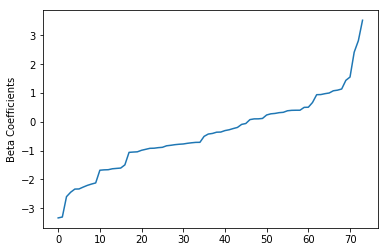

In [160]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


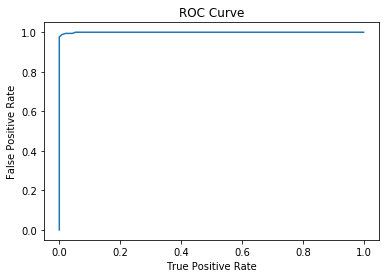

Training set areaUnderROC: 0.9995817739993221


In [161]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [177]:
from pyspark.ml.classification import LogisticRegression

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.46238167490278215
0.2520088729327415
0.20613527116112948
0.17075595213309727
0.11741701103121148
0.08933838670526484
0.06477181110906231
0.048432936178315
0.03866408420912796
0.029646247203161426
0.022905218876229386
+--------------------+-------------------+
|                 FPR|                TPR|
+--------------------+-------------------+
|                 0.0|                0.0|
|                 0.0|0.23976608187134502|
|                 0.0|0.29239766081871343|
|                 0.0|0.34502923976608185|
|                 0.0|0.39766081871345027|
|                 0.0|0.45614035087719296|
|                 0.0| 0.5087719298245614|
|                 0.0| 0.5614035087719298|
|                 0.0| 0.6374269005847953|
|                 0.0| 0.6900584795321637|
|                 0.0| 0.7426900584795322|
|                 0.0| 0.7953216374269005|
|                 0.0|  0.847953216374269|
|                 0.0| 0.9064327485380117|
|                 0.0| 0.9766081

LogisticRegression_9a120424f3b0

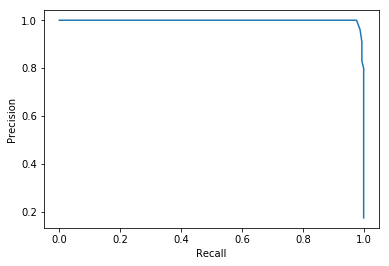

In [162]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [173]:
predictions = lrModel.transform(all[1])
predictions.select('label').show(1000)

+-----+
|label|
+-----+
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|


In [174]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9848501944349205
